In [1]:
import numpy as np, pandas as pd, matplotlib.pyplot as plt, seaborn as sns
from scipy.stats import skew, kurtosis

In [2]:
df = pd.read_csv("../data/raw/AAPL_20250823.csv").set_index('date')

# Statistical summaries

In [3]:
df.info(), df.isna().sum()

<class 'pandas.core.frame.DataFrame'>
Index: 100 entries, 2025-04-01 to 2025-08-22
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   open    100 non-null    float64
 1   close   100 non-null    float64
 2   volume  100 non-null    int64  
dtypes: float64(2), int64(1)
memory usage: 3.1+ KB


(None,
 open      0
 close     0
 volume    0
 dtype: int64)

# Numeric profile

In [4]:
desc = df[['open','close','volume']].describe().T
desc['skew'] = [skew(df[c].dropna()) for c in desc.index]
desc['kurtosis'] = [kurtosis(df[c].dropna()) for c in desc.index]
desc

,count,mean,std,min,25%,50%,75%,max,skew,kurtosis
open,100.0,2.071349e+02,1.115245e+01,171.95,2.005975e+02,2.062275e+02,2.119463e+02,2.340550e+02,0.160114,1.072193
close,100.0,2.073500e+02,1.102744e+01,172.42,2.003900e+02,2.061050e+02,2.124500e+02,2.333300e+02,0.311509,0.745496
volume,100.0,6.007463e+07,2.699664e+07,30621249.00,4.409247e+07,5.136065e+07,6.811059e+07,1.843959e+08,2.121788,5.174317


# Distributions

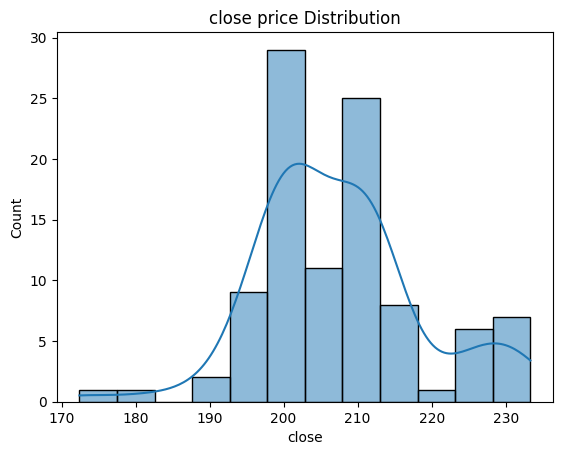

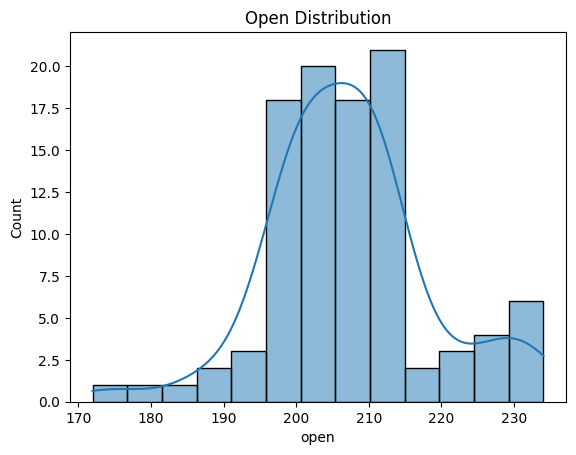

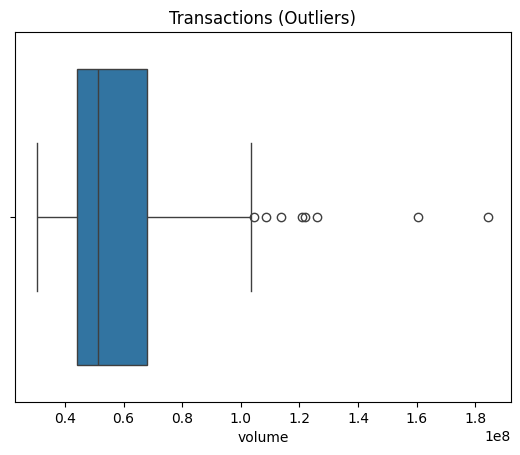

In [7]:
# TODO: histogram + KDE for a key variable
sns.histplot(df['close'], kde=True)
plt.title('close price Distribution')
plt.show()

# TODO: histogram + KDE for a variable
sns.histplot(df['open'], kde=True)
plt.title('Open Distribution')
plt.show()

# TODO: boxplot for outliers
sns.boxplot(x=df['volume'])
plt.title('Transactions (Outliers)')
plt.show()


# Relationships

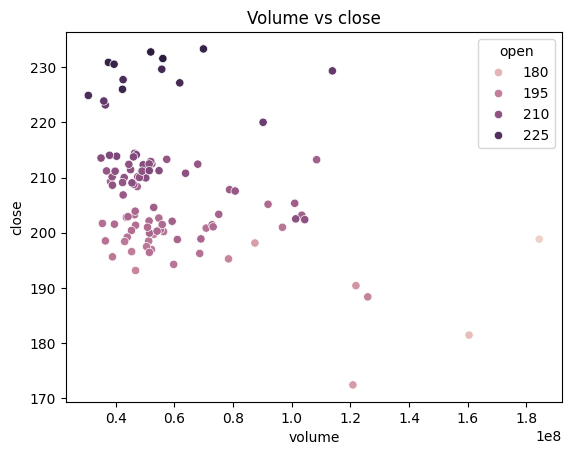

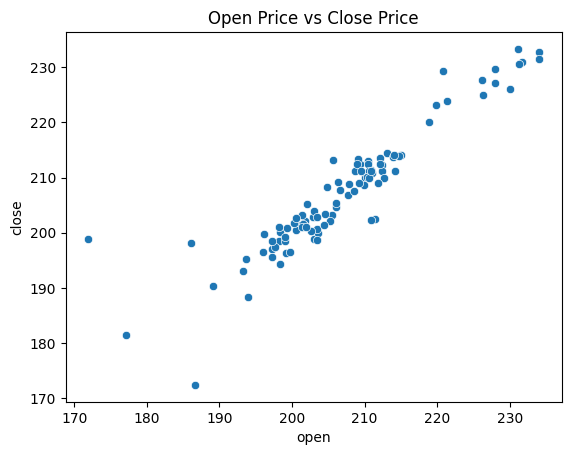

In [8]:
sns.scatterplot(data=df, x='volume', y='close', hue='open')
plt.title('Volume vs close')
plt.show()

sns.scatterplot(data=df, x='open', y='close')
plt.title('Open Price vs Close Price')
plt.show()

## 6) Insights & Assumptions  

### Top 3 Insights  
1. **Skewness & Outliers**  
   - Descriptive statistics show that `volume` has high skewness and kurtosis, consistent with the boxplot identifying extreme outliers.  
   - `close` and `open` are closer to symmetric but still show mild skew, meaning averages may not fully represent their distributions.  

2. **Variable Relationships**  
   - The scatterplot of `open` vs `close` reveals a strong linear relationship, as expected. This validates data integrity and suggests these features carry redundant information but could be transformed into spreads or ratios.  
   - `volume` vs `close` shows weak overall correlation but with larger spreads when volume is extreme, suggesting volume amplifies variability in closing price.  

3. **Structural Patterns**  
   - Histograms and KDE plots show most observations are tightly clustered, but occasional extreme moves create heavy tails.  
   - This “many small moves, few large shocks” structure implies that modeling must account for tail risks, not just central tendencies.  

---

### Assumptions & Risks  
- **Assumptions**  
  - Outliers in `volume` are noise or rare events rather than frequent structural drivers.  
  - The strong `open-close` relationship will remain stable in future data.  
  - Using summary statistics (mean, std) is reasonable despite mild skew.  

- **Risks**  
  - If outliers reflect genuine market shocks, removing or downweighting them may underestimate risk.  
  - Ignoring nonlinear interactions (e.g., `volume × close`) could miss important signals.  
  - If the dataset spans different regimes (bull vs bear markets), global summaries may mask underlying shifts.  

---

### Implications for Next Step  
- **Cleaning**: Consider winsorizing or trimming `volume` to handle extreme outliers; flag and check whether they are data errors or valid events.  
- **Feature Engineering**:  
  - Construct `open_close_spread = |close - open|` to capture intraday movement.  
  - Add rolling features (e.g., 5-day moving average of `close`, rolling std of `net`) to reflect short-term structure and volatility.  

